In [1]:
import numpy as np
import os

This script preprocess the Multivariate Time Series (MVTS) datasets for unsupervised anomaly detection tasks. After preprocessing, we should get:
1. A (or a list of) multidimensional training features. Numpy.ndarray with shape `(Ttrain, d)`.
2. A (or a list of) multidimensional testing features. Numpy.ndarray with shape `(Ttest, d)`.
3. (Or a list of) Labels for each time `Ttest`. Numpy.ndarray with shape `(Ttest,)`.

## SKAB Data

In [2]:
def read_skab_data(rootpath='./SKAB'):
    # Train Data
    traindata = np.genfromtxt(os.path.join(rootpath,'anomaly-free/anomaly-free.csv'), delimiter=';')
    traindata = traindata[1:,1:]
    
    # Test Data
    testdata = []
    testlabel = []
    for path in os.listdir(rootpath):
        if path != '.DS_Store' and path != 'anomaly-free':
            for fn in os.listdir(os.path.join(rootpath, path)):
                curdata = np.genfromtxt(os.path.join(rootpath,path,fn), delimiter=';')[1:,1:]
                testdata.append(curdata[:,:8])
                testlabel.append(curdata[:,8].astype(int))
    
    return traindata, testdata, testlabel

## SMD Data

In [3]:
def read_smd_data(rootpath='./SMD'):
    traindata = []
    testdata = []
    testlabel = []
    machines = os.listdir(os.path.join(rootpath, 'train'))
    sorted(machines)
    for m in machines:
        traindata.append(np.genfromtxt(os.path.join(rootpath, 'train', m), delimiter=','))
        testdata.append(np.genfromtxt(os.path.join(rootpath, 'test', m), delimiter=','))
        testlabel.append(np.genfromtxt(os.path.join(rootpath, 'test_label', m)))
    return traindata, testdata, testlabel

The following is a snippet to visulize some testdata...

## SKAB Data

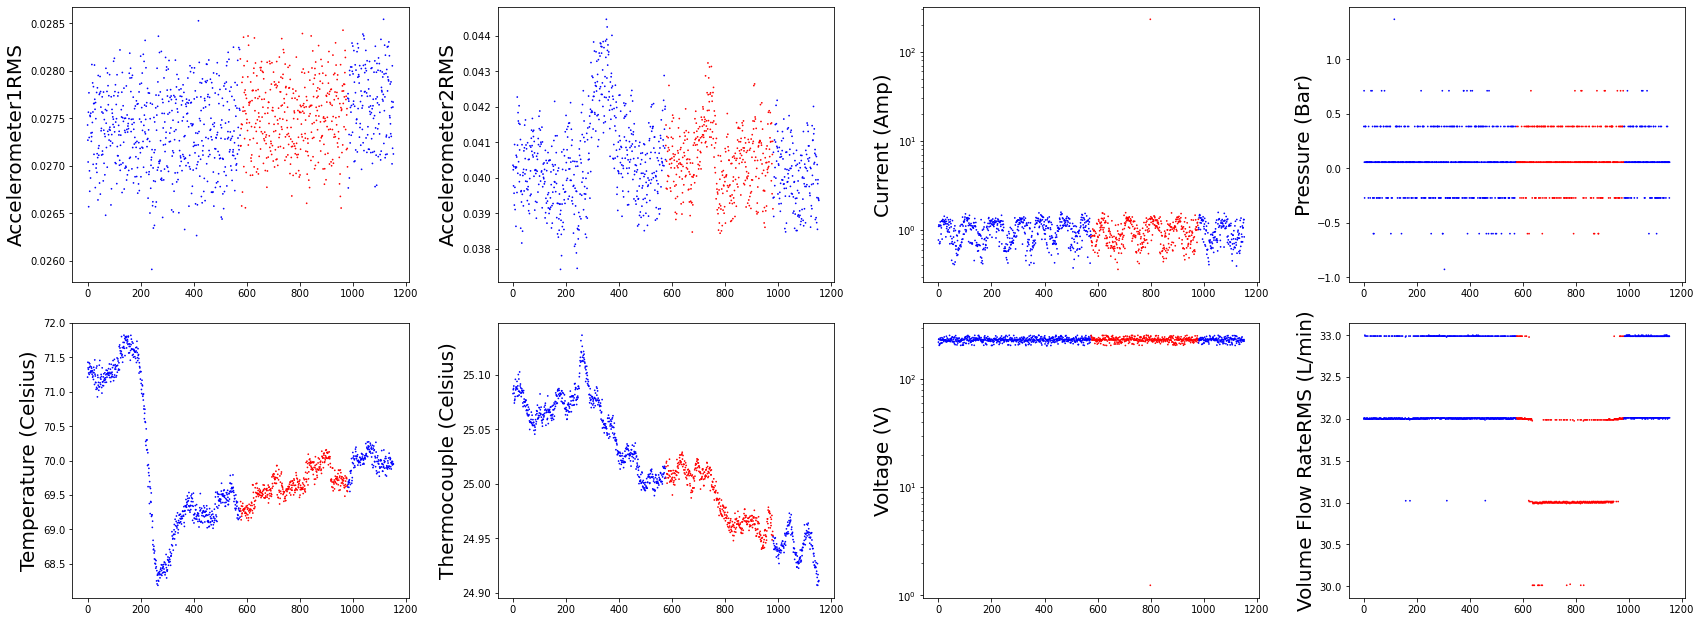

In [18]:
import matplotlib.pyplot as plt
if __name__ == '__main__':
    _, testdata, testlabel = read_skab_data()
    fig, axes = plt.subplots(2,4,figsize=(24,9))
    label = ['Accelerometer1RMS','Accelerometer2RMS', 'Current (Amp)', 'Pressure (Bar)', 'Temperature (Celsius)', 'Thermocouple (Celsius)', 'Voltage (V)', 'Volume Flow RateRMS (L/min)']
    color_map = {1:'r',0:'b'}
    for i in range(2):
        for j in range(4):
            if i == 0 and j == 2 or i == 1 and j == 2:
                axes[i,j].scatter(range(testdata[0].shape[0]),testdata[0][:,4*i+j],s=0.5,c=[color_map[i] for i in testlabel[0]])
                axes[i,j].set_ylabel(label[4*i+j], fontsize=20)
                axes[i,j].set_yscale('log')
            else:
                axes[i,j].scatter(range(testdata[0].shape[0]),testdata[0][:,4*i+j],s=0.5,c=[color_map[i] for i in testlabel[0]])
                axes[i,j].set_ylabel(label[4*i+j], fontsize=20)
    fig.tight_layout(pad=2)
    plt.show()


## SMD Data

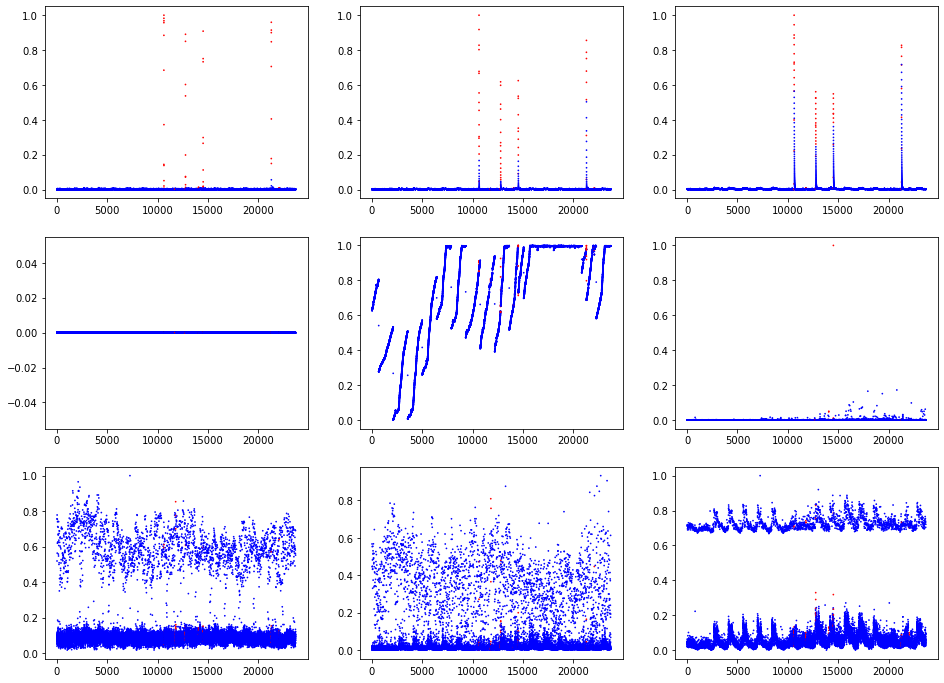

In [5]:
if __name__ == '__main__':
    _, testdata, testlabel = read_smd_data()
    fig, axes = plt.subplots(3,3,figsize=(16,12))
    color_map = {1:'r',0:'b'}
    ind_list = np.array([[1,2,3],
                         [4,5,9],
                         [13,14,15]])
    for i in range(3):
        for j in range(3):
            axes[i,j].scatter(range(testdata[0].shape[0]),testdata[0][:,ind_list[i,j]],s=0.5,c=[color_map[i] for i in testlabel[0]])
    plt.show()